# TensorBoard

In [1]:
# import libraries 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# ignore warnings in the output 
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

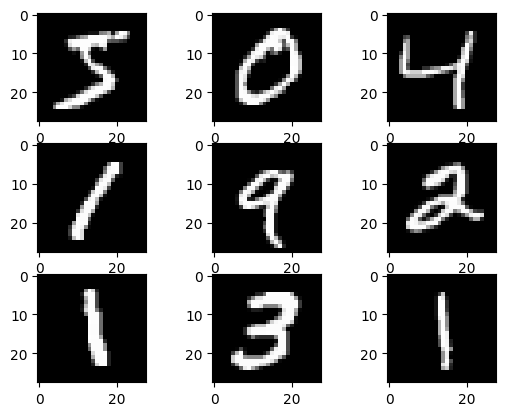

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 225.0
X_test = X_test / 225.0

# plot the first 9 images in the training set
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 +i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
# create the model using convolutional layers, max pooling layers, and a dropout layer
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((1, 1)), # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2), # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
# compile the model 
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 37s 18ms/step - loss: 0.7773 - accuracy: 0.7316 - val_loss: 0.1943 - val_accuracy: 0.9439
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3647 - accuracy: 0.8848 - val_loss: 0.1458 - val_accuracy: 0.9542
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2978 - accuracy: 0.9071 - val_loss: 0.1034 - val_accuracy: 0.9709
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2609 - accuracy: 0.9166 - val_loss: 0.0938 - val_accuracy: 0.9734
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0854 - accuracy: 0.9742
Test accuracy: 0.9742000102996826


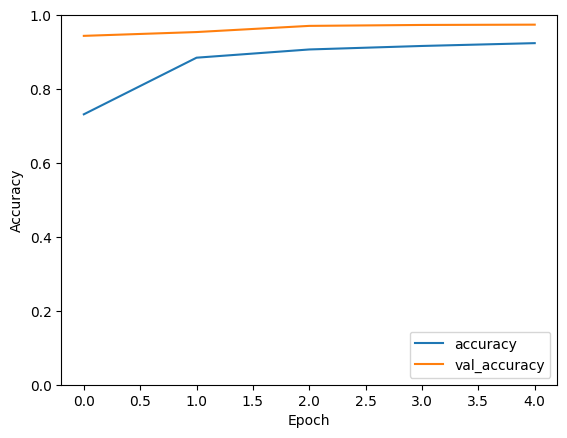

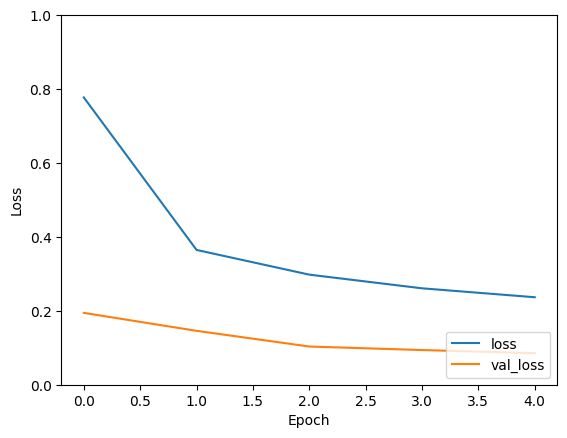

In [6]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


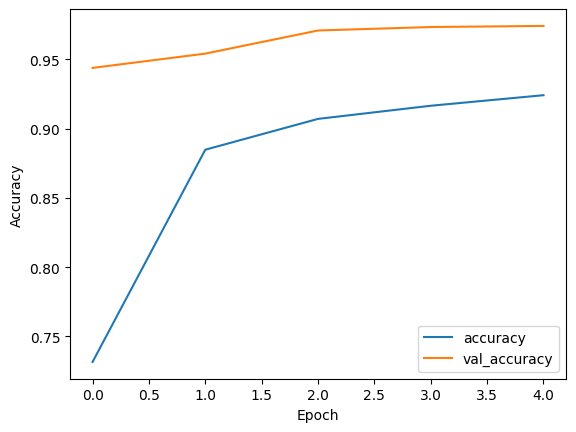

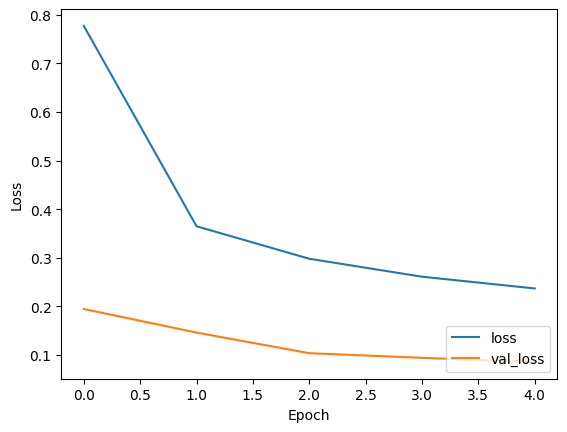

In [7]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# Let's do it in tensorboard

In [8]:
# create the model using convolutional layers, max pooling layers, and a dropout layer
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((1, 1)), # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2), # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model 
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Let's create a call back function of tensorboard 
tensorboard_callback = TensorBoard(log_dir="./logs_class_run", histogram_freq=1)

In [28]:
model.fit(X_train, y_train, epochs=5,
          batch_size = 32, 
          validation_data = (X_test, y_test),
          callbacks = [tensorboard_callback])

Epoch 1/5
  35/1875 [..............................] - ETA: 28s - loss: 0.3347 - accuracy: 0.8795

1875/1875 [==============================] - 31s 17ms/step - loss: 0.2938 - accuracy: 0.8946 - val_loss: 0.0789 - val_accuracy: 0.9787
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2722 - accuracy: 0.9039 - val_loss: 0.0739 - val_accuracy: 0.9789
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2532 - accuracy: 0.9111 - val_loss: 0.0692 - val_accuracy: 0.9801
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2394 - accuracy: 0.9178 - val_loss: 0.0706 - val_accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2347 - accuracy: 0.9203 - val_loss: 0.0660 - val_accuracy: 0.9822


In [ ]:
# Activate inline tensorboard extension
%load_ext tensorboard

# run tensorboard of recent logs here
%tensorboard --logdir=./logs_class_run